# Fluence simulation

## Reading MCL data

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("Water_250_stock.xlsx")

In [3]:
df

,Wavelength (nm),DI Water,250 mg_dL,Stock
0,2000,2.970503,2.938040,2.339324
1,1998,3.101782,3.162713,2.392318
2,1996,3.055240,3.191409,2.431312
3,1994,3.278982,3.187765,2.505155
4,1992,3.177642,3.357545,2.568891
...,...,...,...,...
496,1008,-0.007674,-0.006970,-0.009652
497,1006,-0.007194,-0.006503,-0.009274
498,1004,-0.006678,-0.006059,-0.008994
499,1002,-0.006311,-0.005661,-0.008679


In [4]:
df.set_index("Wavelength (nm)", inplace=True)

<Axes: xlabel='Wavelength (nm)'>

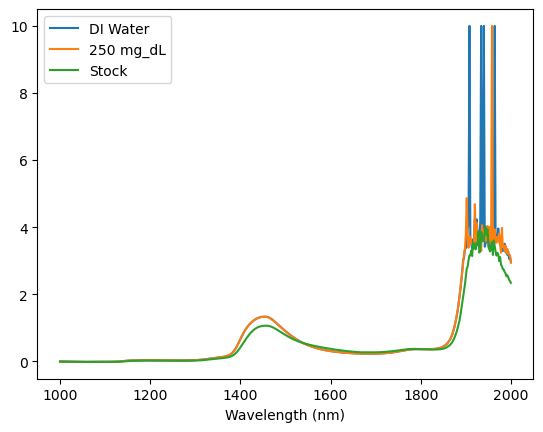

In [5]:
df.plot()

## Calculating transmission at 1mm, 10mm, 20mm

In [6]:
import math

In [7]:
def transmission(mu_a, d):
    return math.exp(-mu_a * d)

In [8]:
def transmission_df(absorption_df, d_list):
    df_list = []
    for d in d_list:
        df = pd.DataFrame(index=absorption_df.index)
        for column in absorption_df.columns:
            df[column] = absorption_df[column].apply(lambda x: transmission(x, d))
        df_list.append(df)
    return df_list

In [9]:
df_list = transmission_df(df, [1e-3, 10e-3, 20e-3])

### 1mm

<Axes: xlabel='Wavelength (nm)'>

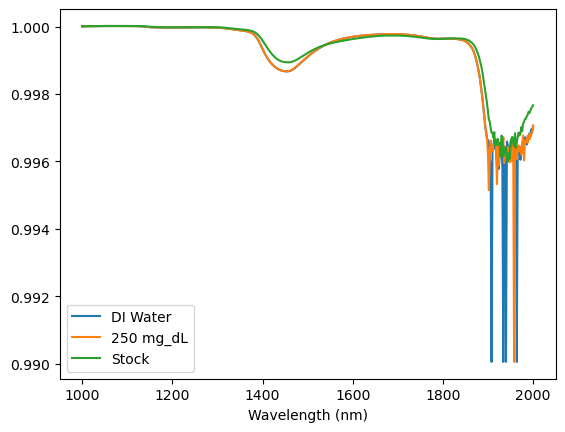

In [10]:
df_list[0].plot()

### 10mm

<Axes: xlabel='Wavelength (nm)'>

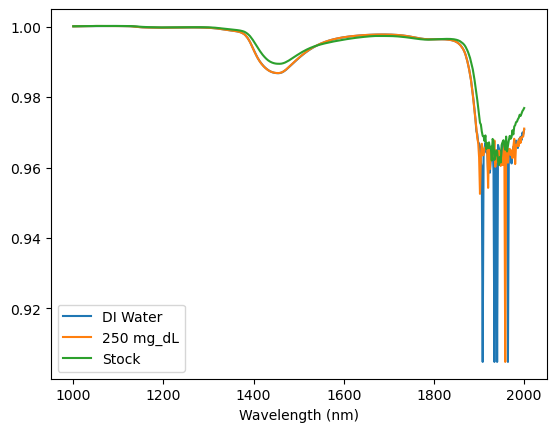

In [11]:
df_list[1].plot()

### 20mm

<Axes: xlabel='Wavelength (nm)'>

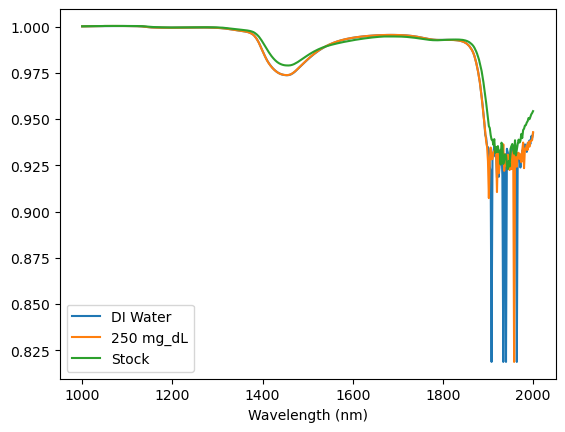

In [12]:
df_list[2].plot()

## DI Water transmission at 1mm, 10mm, 20mm

In [13]:
df_DI = pd.DataFrame(index=df.index)

In [14]:
df_DI["1mm"]=df_list[0]["DI Water"]
df_DI["10mm"]=df_list[1]["DI Water"]
df_DI["20mm"]=df_list[2]["DI Water"]

<Axes: xlabel='Wavelength (nm)'>

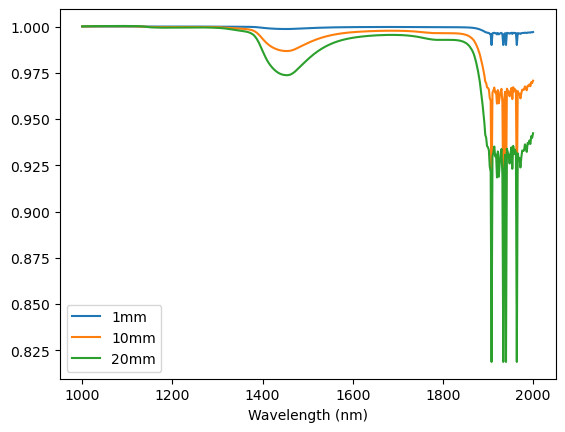

In [15]:
df_DI.plot()

## 250 mg/dL transmission at 1mm, 10mm, 20mm

In [16]:
df_250 = pd.DataFrame(index=df.index)

In [17]:
df_250["1mm"]=df_list[0]["250 mg_dL"]
df_250["10mm"]=df_list[1]["250 mg_dL"]
df_250["20mm"]=df_list[2]["250 mg_dL"]

<Axes: xlabel='Wavelength (nm)'>

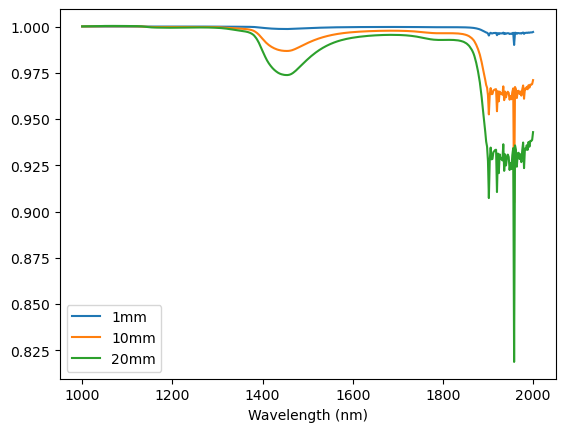

In [18]:
df_250.plot()

## Stock transmission at 1mm, 10mm, 20mm

In [19]:
df_stock = pd.DataFrame(index=df.index)

In [20]:
df_stock["1mm"]=df_list[0]["Stock"]
df_stock["10mm"]=df_list[1]["Stock"]
df_stock["20mm"]=df_list[2]["Stock"]

<Axes: xlabel='Wavelength (nm)'>

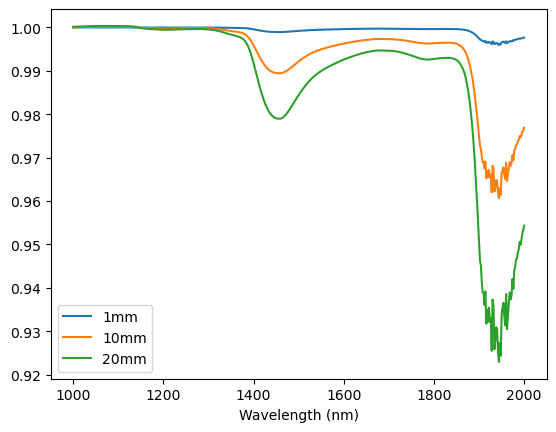

In [21]:
df_stock.plot()

## PA Signal at 1mm, 10mm, 20mm

### Stock

<Axes: xlabel='Wavelength (nm)'>

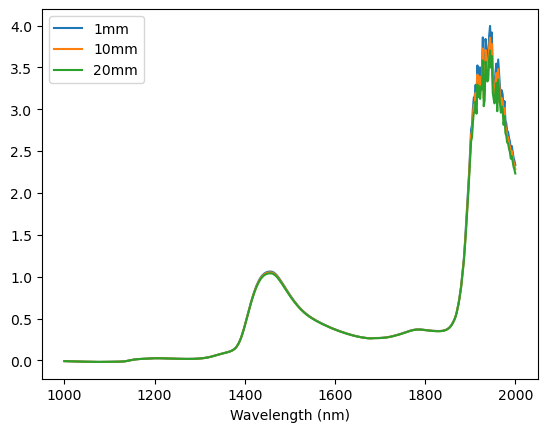

In [22]:
df_stock.multiply(df["Stock"], axis=0).plot()

### 250 mg_dL

<Axes: xlabel='Wavelength (nm)'>

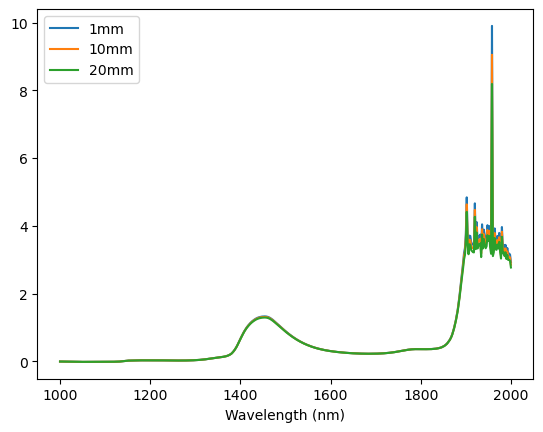

In [23]:
df_250.multiply(df["250 mg_dL"], axis=0).plot()

### DI Water

<Axes: xlabel='Wavelength (nm)'>

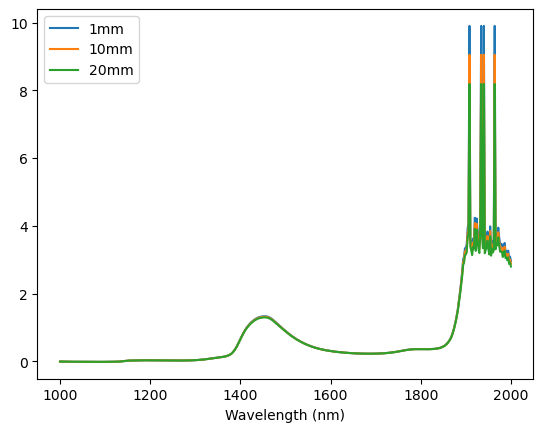

In [24]:
df_DI.multiply(df["DI Water"],axis=0).plot()